# Data Description

**Demographic**: 

- Sex: male or female ("M" or "F") 

- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

**Education** : 

- Education :1 - Higher Secondary, 2- Graduate, 3 - Post Graduate 4- Doctarte or PHD

**Behavioural**:

- is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

- Cigs Per Day: the number of cigarettes that the person smoked on average in one day .(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history)**:

- BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

- Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

- Diabetes: whether or not the patient had diabetes (Nominal) 

**Medical(current)**:

- Tot Chol: total cholesterol level (Continuous) 

- Sys BP: systolic blood pressure (Continuous) 

- Dia BP: diastolic blood pressure (Continuous) 

- BMI: Body Mass Index (Continuous) 

- Heart Rate: heart rate(Continuous - In medical research, variables such as heart rate thought discrete, are considered continuous because of a large number of possible values.) 

- Glucose: glucose level (Continuous) 

**Predict variable (desired target)**: 

- TenYearCHD : 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) – DV

In [1]:
# Immporting important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, r2_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, auc
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv("data_cardiovascular_risk.csv")
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# Descriptive Analysis

In [3]:
df.shape

(3390, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#Checking for duplicate rows

df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [7]:
# looking for null values

df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
# Number of uniques values in per column

for i in df.columns:
  print(f"Number of unique values in the column {i} are {df[i].nunique()}.")

Number of unique values in the column id are 3390.
Number of unique values in the column age are 39.
Number of unique values in the column education are 4.
Number of unique values in the column sex are 2.
Number of unique values in the column is_smoking are 2.
Number of unique values in the column cigsPerDay are 32.
Number of unique values in the column BPMeds are 2.
Number of unique values in the column prevalentStroke are 2.
Number of unique values in the column prevalentHyp are 2.
Number of unique values in the column diabetes are 2.
Number of unique values in the column totChol are 240.
Number of unique values in the column sysBP are 226.
Number of unique values in the column diaBP are 142.
Number of unique values in the column BMI are 1259.
Number of unique values in the column heartRate are 68.
Number of unique values in the column glucose are 132.
Number of unique values in the column TenYearCHD are 2.


## Data Imputation

In [9]:
def impute_missing_values(df, imputation_dict):
    for column, method in imputation_dict.items():
        if method == 'mode':
            df[column].fillna(df[column].mode()[0], inplace=True)
        elif method == 'median':
            df[column].fillna(df[column].median(), inplace=True)
    return df

# We can impute values in the categorical columns with their mode and for numerical / continuous columns with their median.
imputation_dict = {
    "education" : 'mode',
    "BPMeds" : 'mode',
    "cigsPerDay" : 'median',
    "totChol" : 'median',
    "BMI" : 'median',
    "glucose" : 'median',
    "heartRate" : 'median'
}

# Apply imputation
df = impute_missing_values(df, imputation_dict) 

# Univariate Analysis

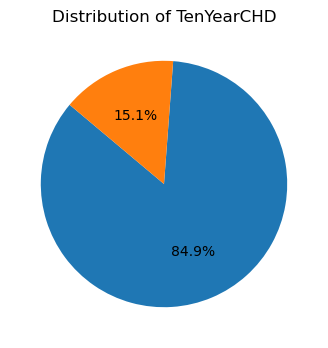

In [10]:
# Target Column Distribution

plt.figure(figsize=(4, 4))
plt.pie(df.TenYearCHD.value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TenYearCHD')
plt.show()

We can clearly see the data is imbalanced so we have to balance it.

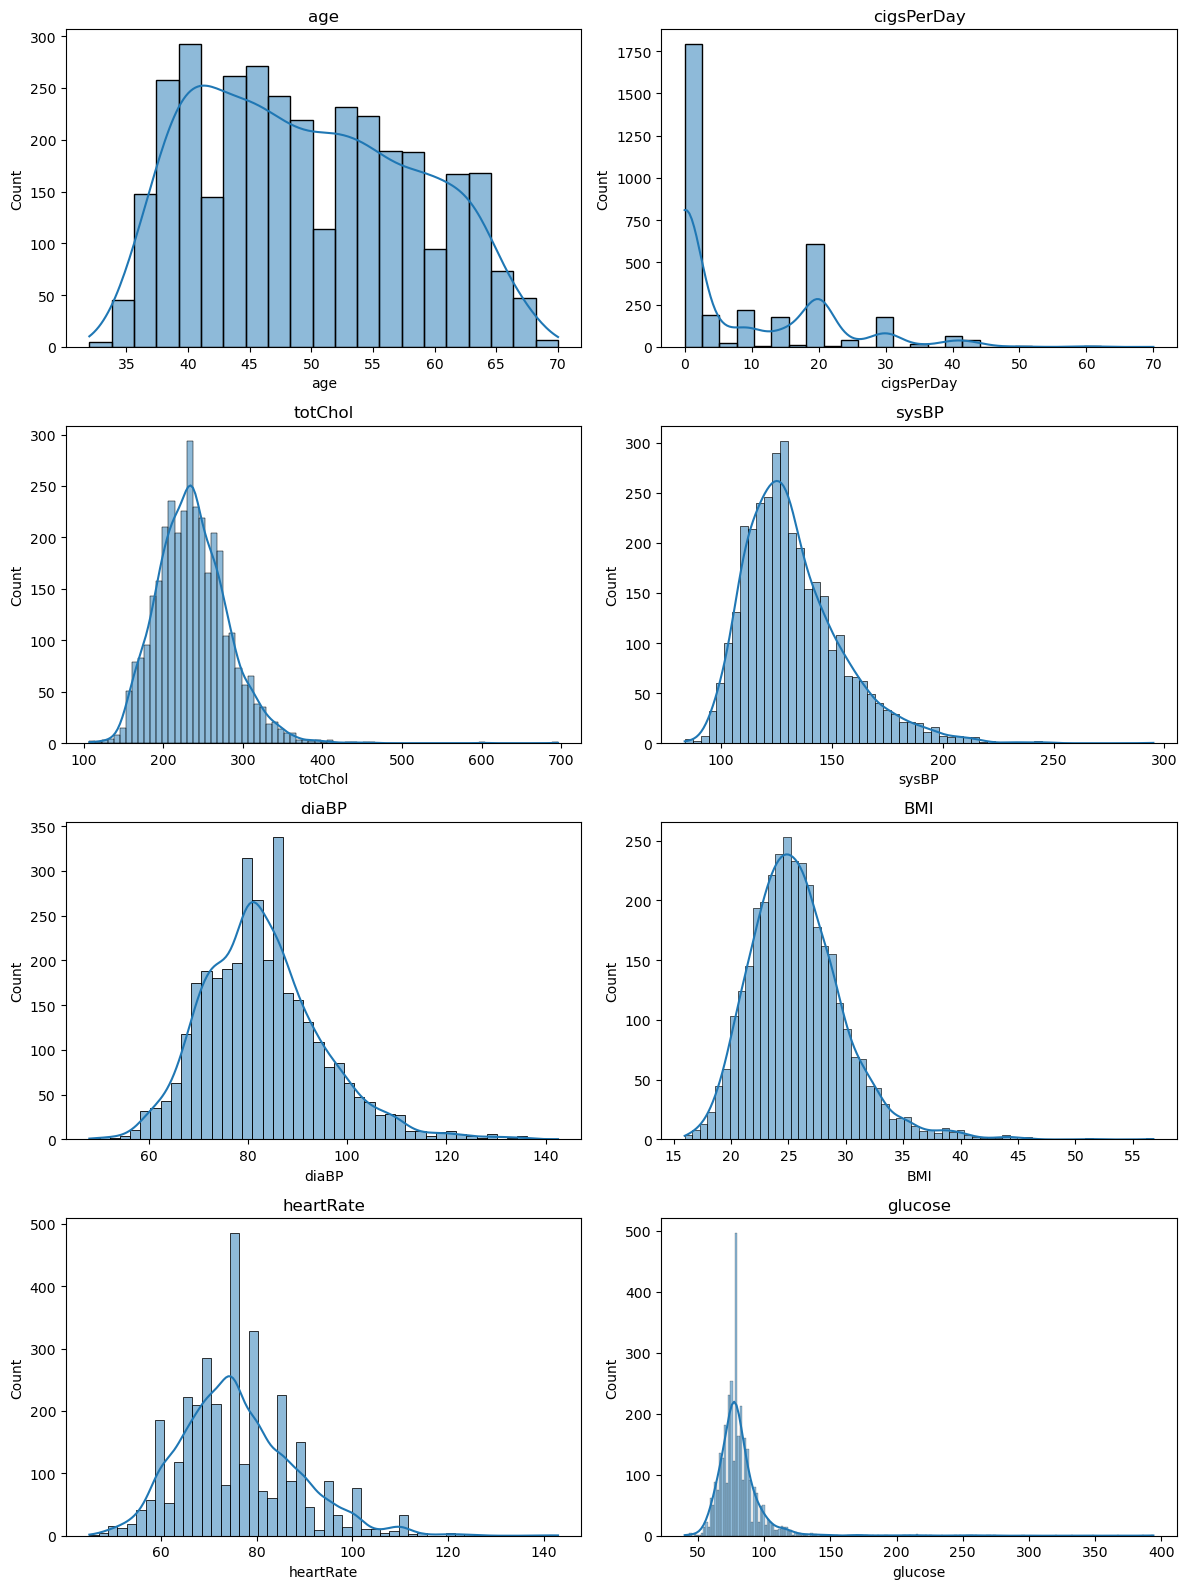

In [11]:
# Histplot for every numerical columns

numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
num_rows= 4

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot distplot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

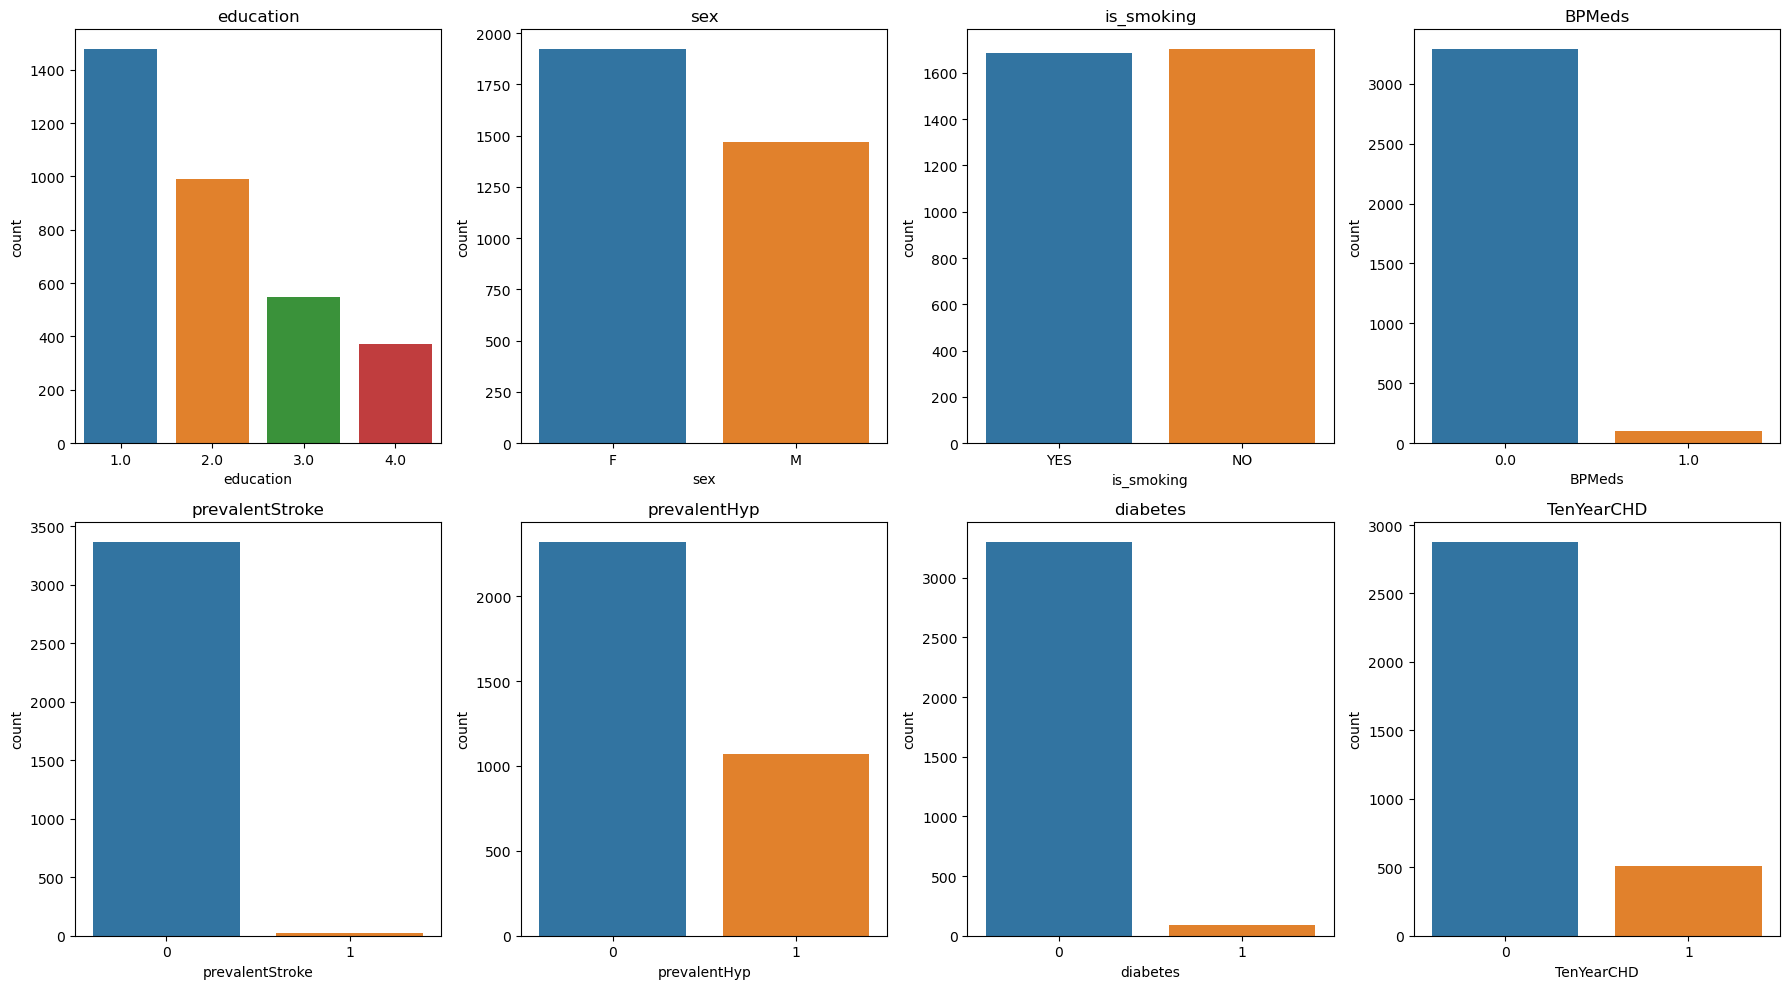

In [12]:
# CountPlot for every Categorical columns

categorical_columns = ['education', 'sex', 'is_smoking', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Flatten the axes array
axes = axes.flatten()

# Plot countplot for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [13]:
# Function for plotting barplot between one categorical and all numerical column

def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(18, 10))

    # Flatten the axes array
    axes = axes.flatten()

    # Plot bar plot for the chosen categorical column against each numerical column
    for i, column in enumerate(numerical_columns):
        sns.barplot(x=categorical_column, y=column, data=df, ax=axes[i])
        axes[i].set_title(f'{categorical_column} vs {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

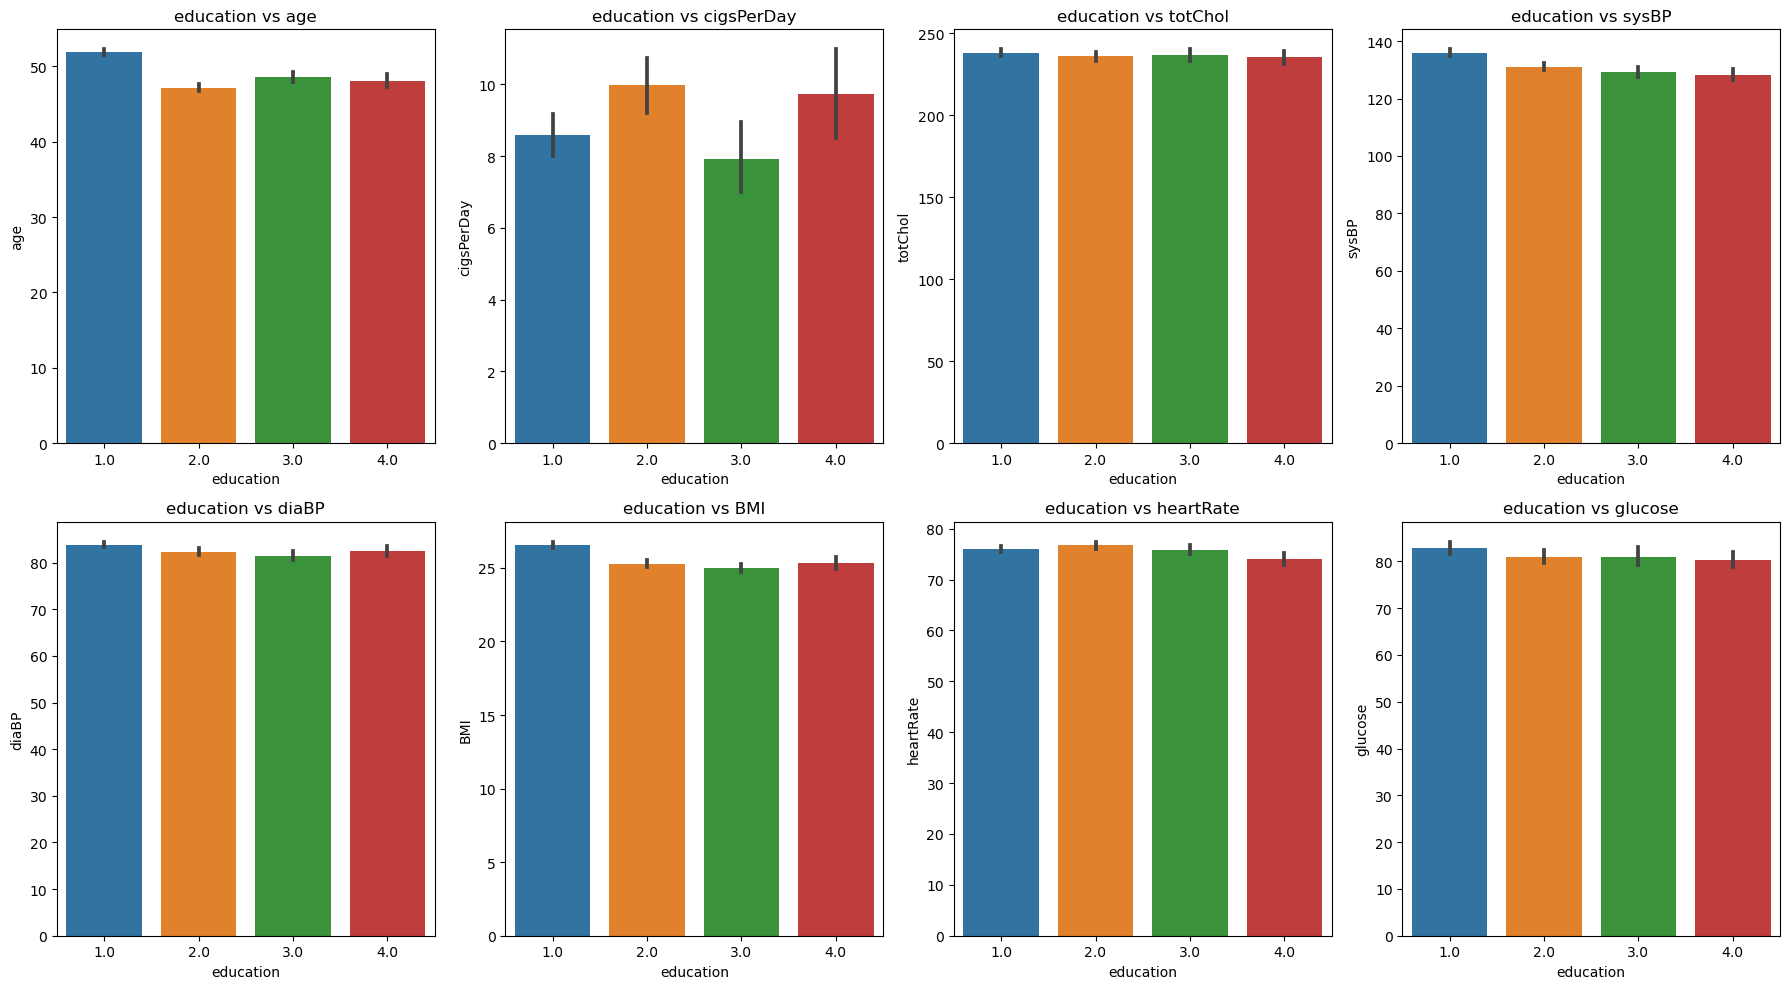

In [14]:
# Education column analysis

plot_categorical_vs_numerical(df,'education',numerical_columns)

**Blood Pressure** : People with higher levels of education tend to have lower systolic and diastolic blood pressure.

**Body Mass Index (BMI)**: There seems to be a weak inverse relationship between education and BMI. People with higher levels of education tend to have a lower BMI.

**Heart Rate**: The data for heart rate is inconclusive. There seems to be no clear association between education and heartrate.

**Smoking**: There seems to be an inverse relationship between education and the number of cigarettes smoked per day. People with higher levels of education tend to smoke less.

**Cholesterol**: There seems to be a weak inverse relationship between education and total cholesterol. People with higher levels of education tend to have lower cholesterol.

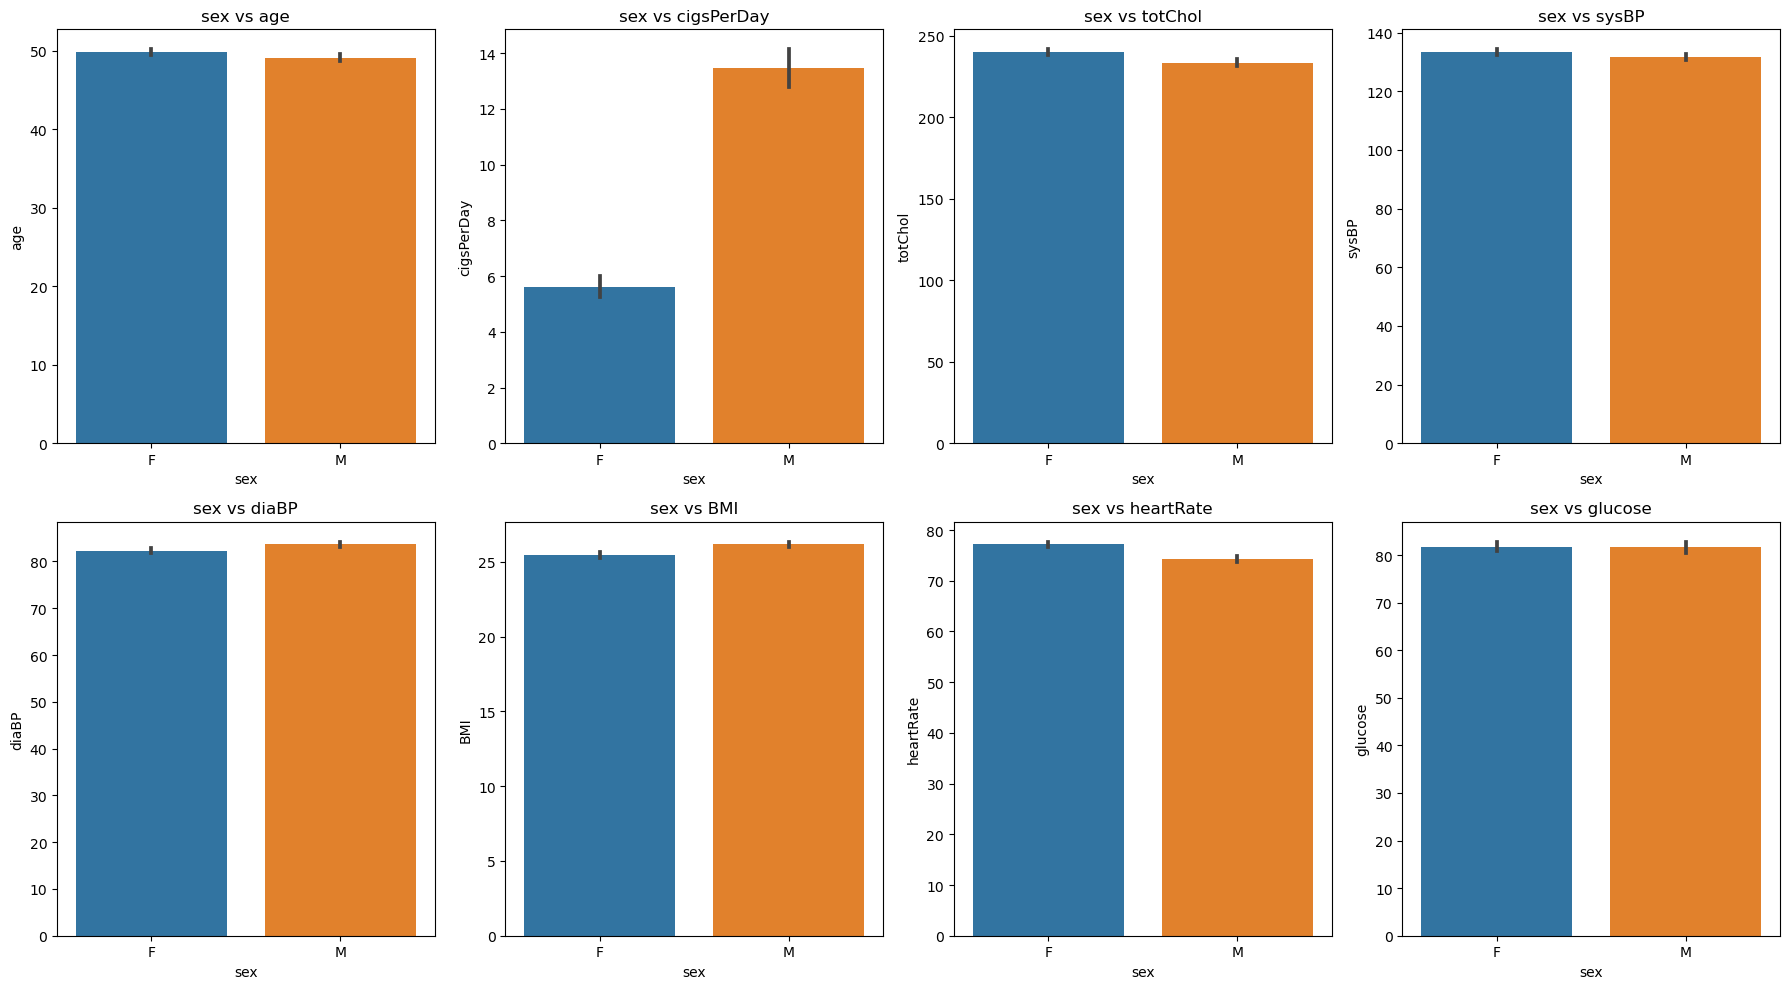

In [15]:
# Sex(Gender) column analysis

plot_categorical_vs_numerical(df,'sex',numerical_columns)

- Men tend to be older.
- Men smoke more cigarettes per day.
- Men have higher total cholesterol, systolic and diastolic blood pressure, and BMI.
- Women tend to have higher heart rates and blood glucose levels.

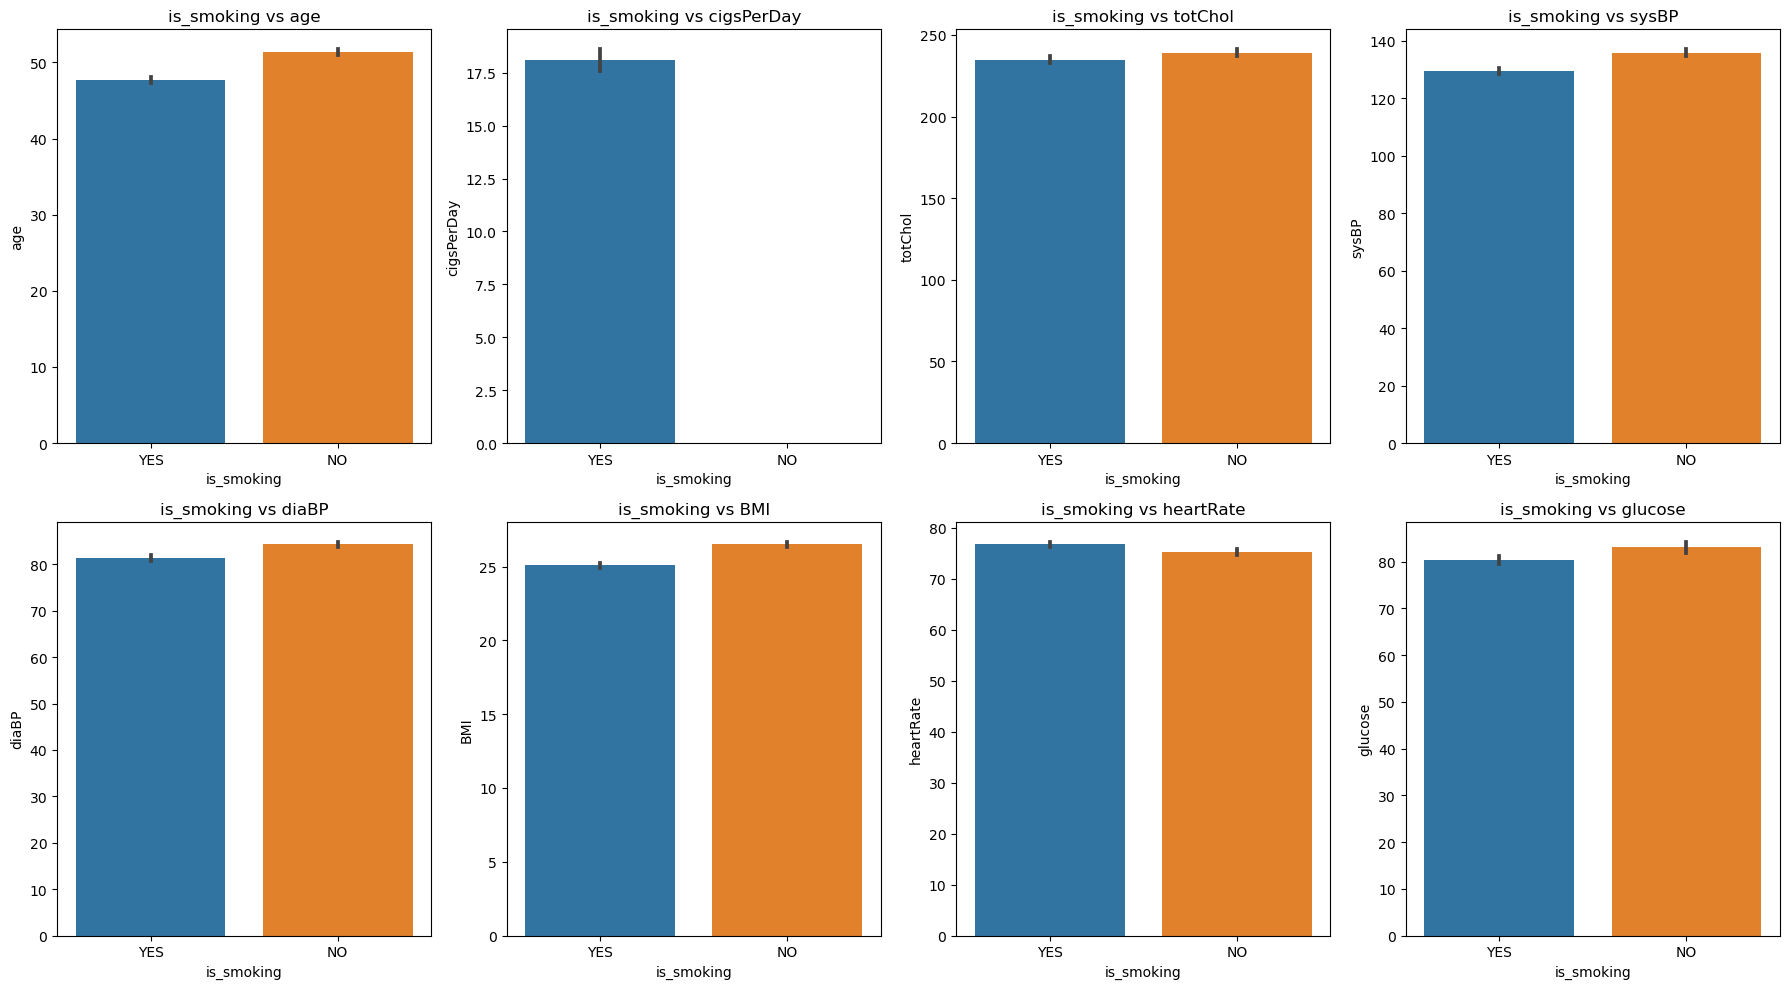

In [16]:
# is_smoking column analysis

plot_categorical_vs_numerical(df,'is_smoking',numerical_columns)

Smokers tend to be older and have higher cholesterol than non-smokers.
The data for blood pressure, BMI, heart rate, and blood glucose is inconclusive.

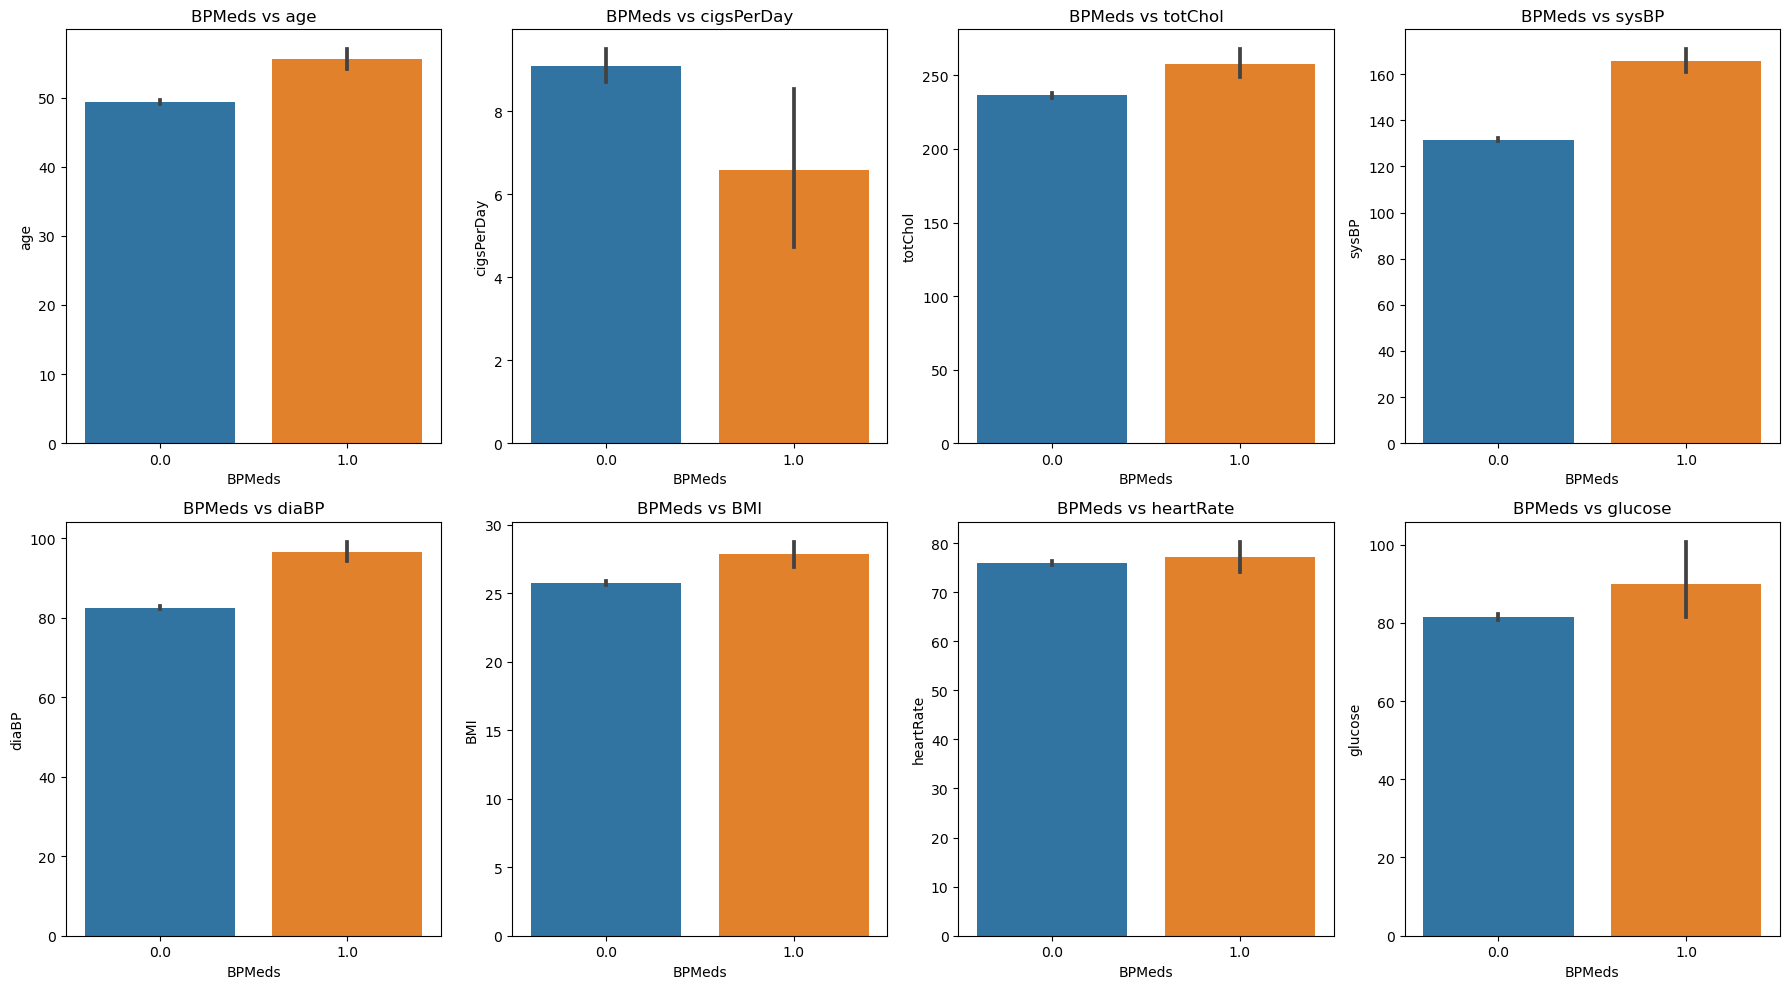

In [17]:
# BPMeds column analysis

plot_categorical_vs_numerical(df,'BPMeds',numerical_columns)

No clear association between BP meds and age, BMI, heart rate, or blood sugar.
On the other hand, the data suggests that people who use blood pressure medication tend to have lower systolic and diastolic blood pressure. This is likely because blood pressure medication is designed to lower blood pressure. Additionally, people who use blood pressure medication tend to smoke fewer cigarettes per day, this could be because smoking can raise blood pressure.

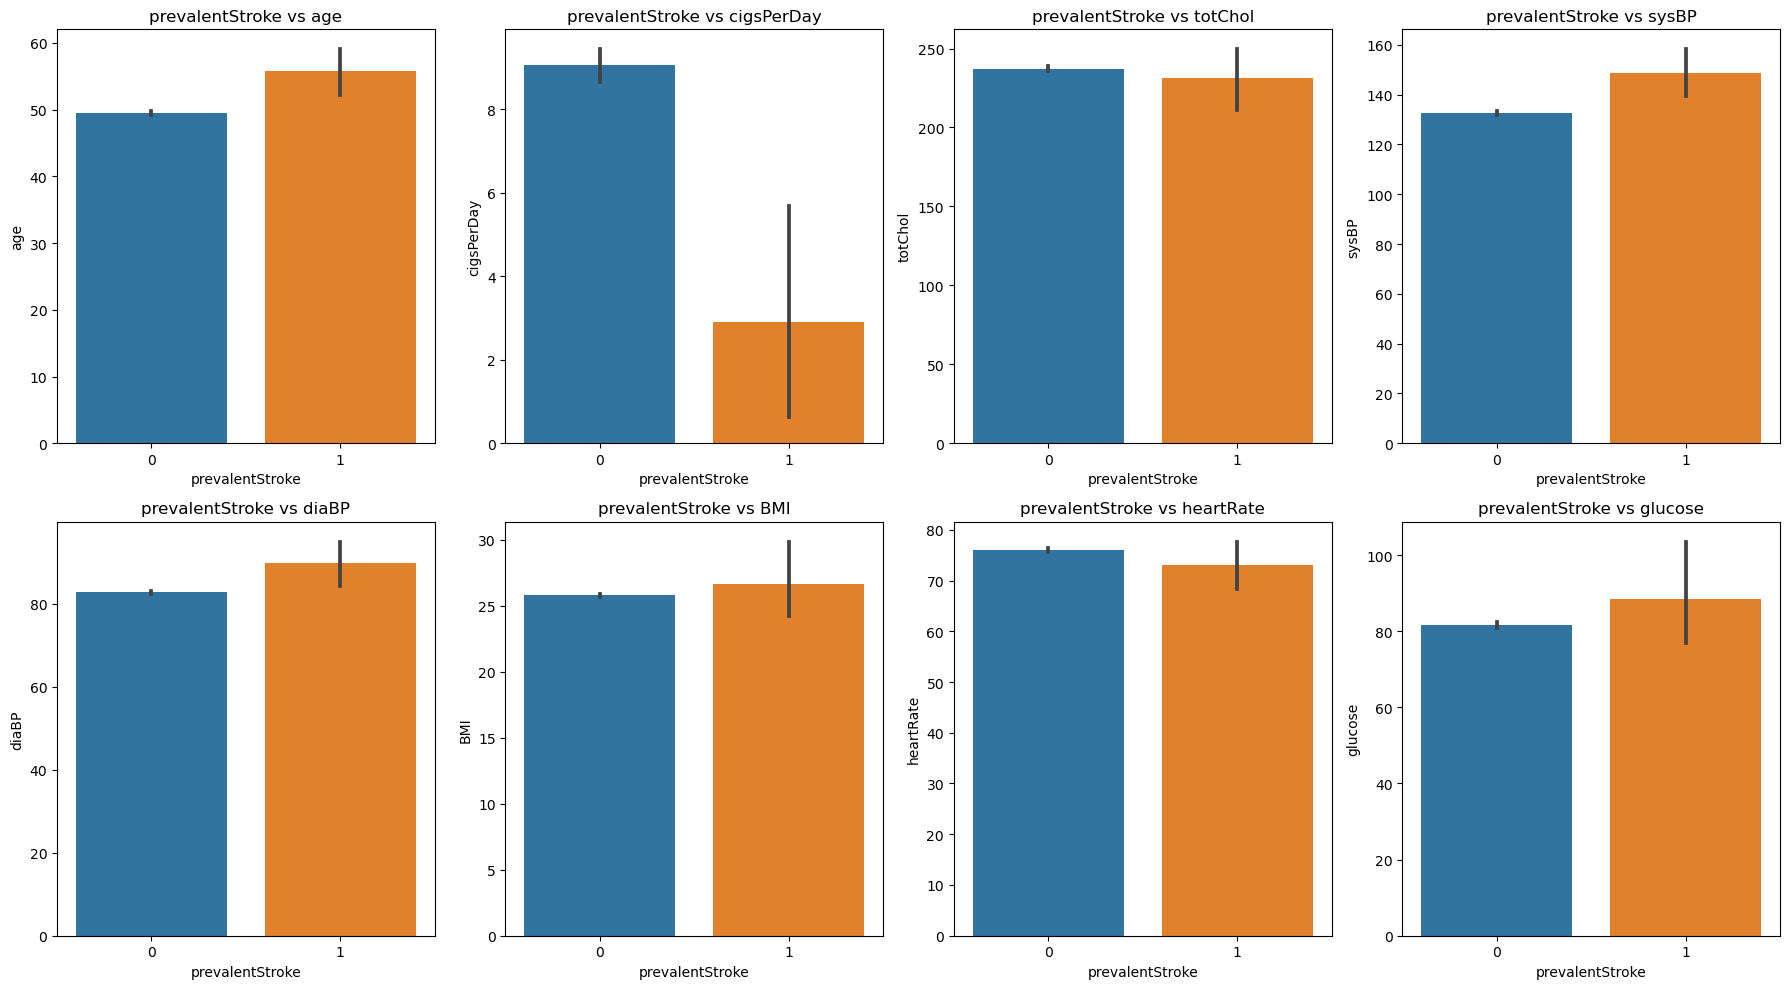

In [18]:
# PrevalentStroke column analysis

plot_categorical_vs_numerical(df,'prevalentStroke',numerical_columns)

Age, cigarettes per day, systolic blood pressure, and diastolic blood pressure all show a positive correlation with prevalent stroke. This means that as these factors increase, the number of prevalent stroke cases also increases. These factors are all known risk factors for stroke.

The data for total cholesterol, BMI, heart rate, and blood glucose is inconclusive. There isn't a clear trend between these factors and prevalent stroke cases

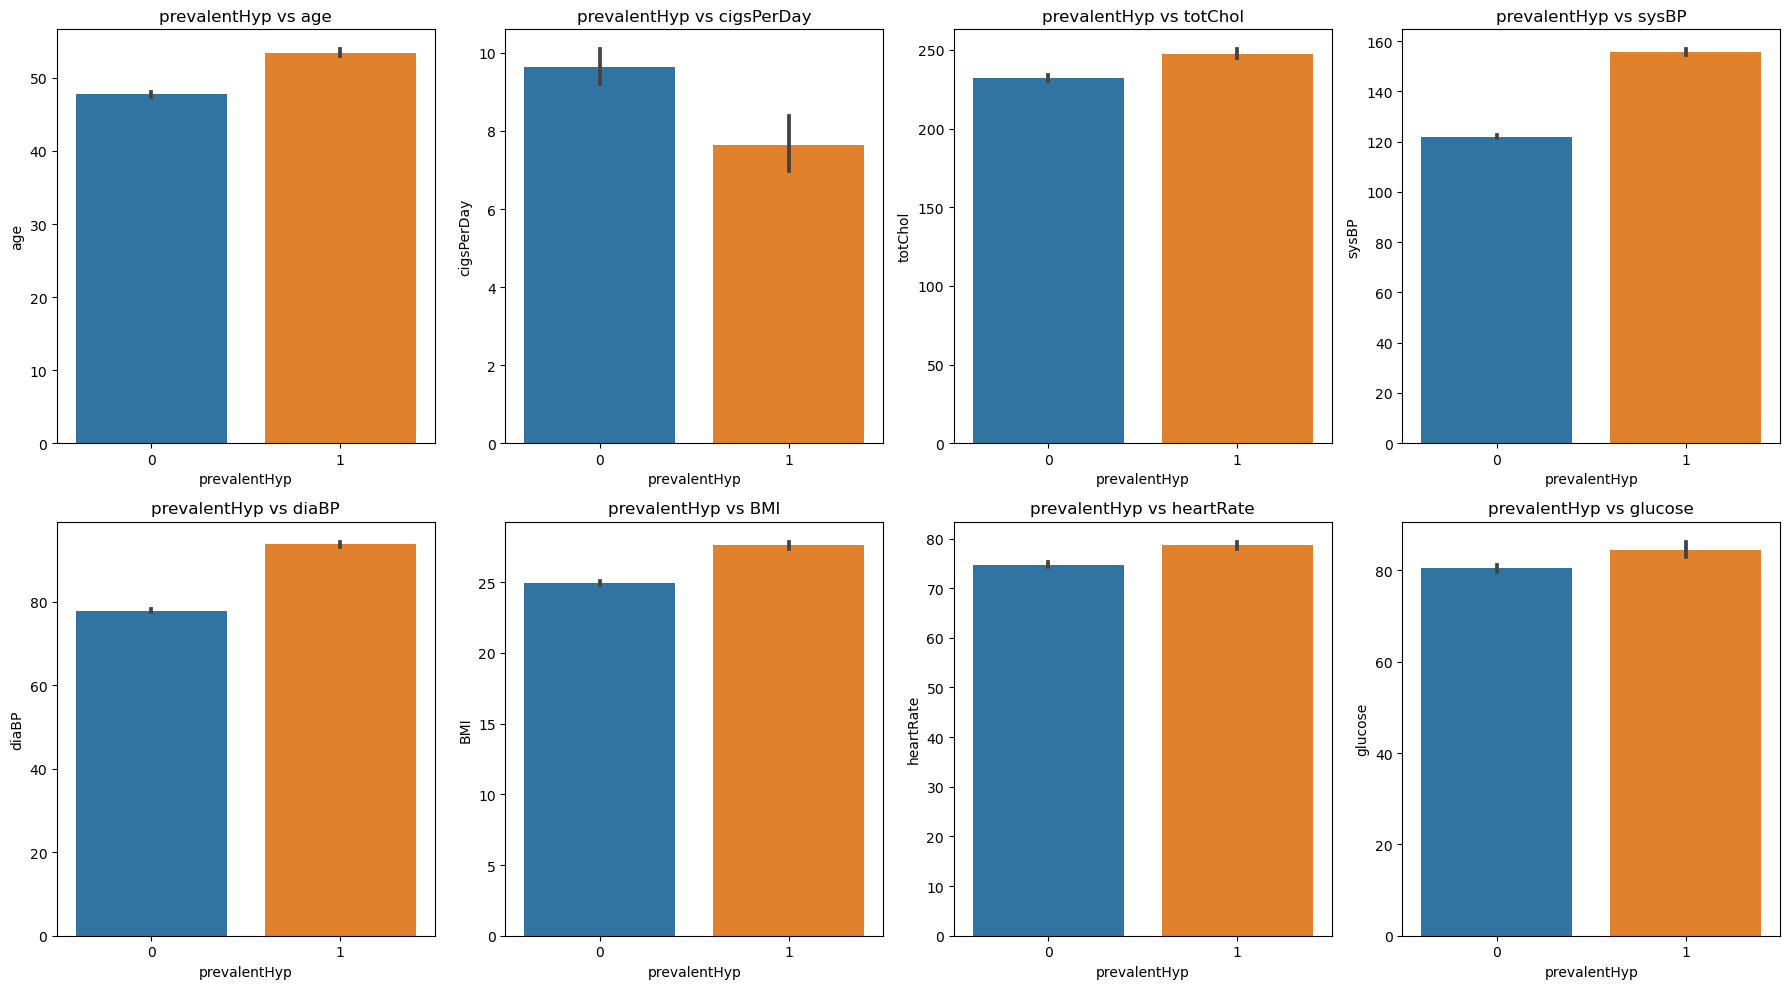

In [19]:
# PrevalentHyp column analysis

plot_categorical_vs_numerical(df,'prevalentHyp',numerical_columns)

- Age: The prevalence of hypertension increases with age. This is likely due to a number of factors, including the degeneration of the arteries and kidneys over time, as well as changes in hormone levels.
- Cigarettes per day: Smoking is a major risk factor for hypertension. Smoking damages the blood vessels and makes them more narrow, which can increase blood pressure.
- Systolic blood pressure (SysBP): This is the top number in a blood pressure reading. It represents the pressure against the artery walls when the heart beats. The higher the systolic blood pressure, the greater the risk of hypertension.
- Diastolic blood pressure (DiaBP): This is the bottom number in a blood pressure reading. It represents the pressure against the artery walls when the heart is at rest. The higher the diastolic blood pressure, the greater the risk of hypertension.

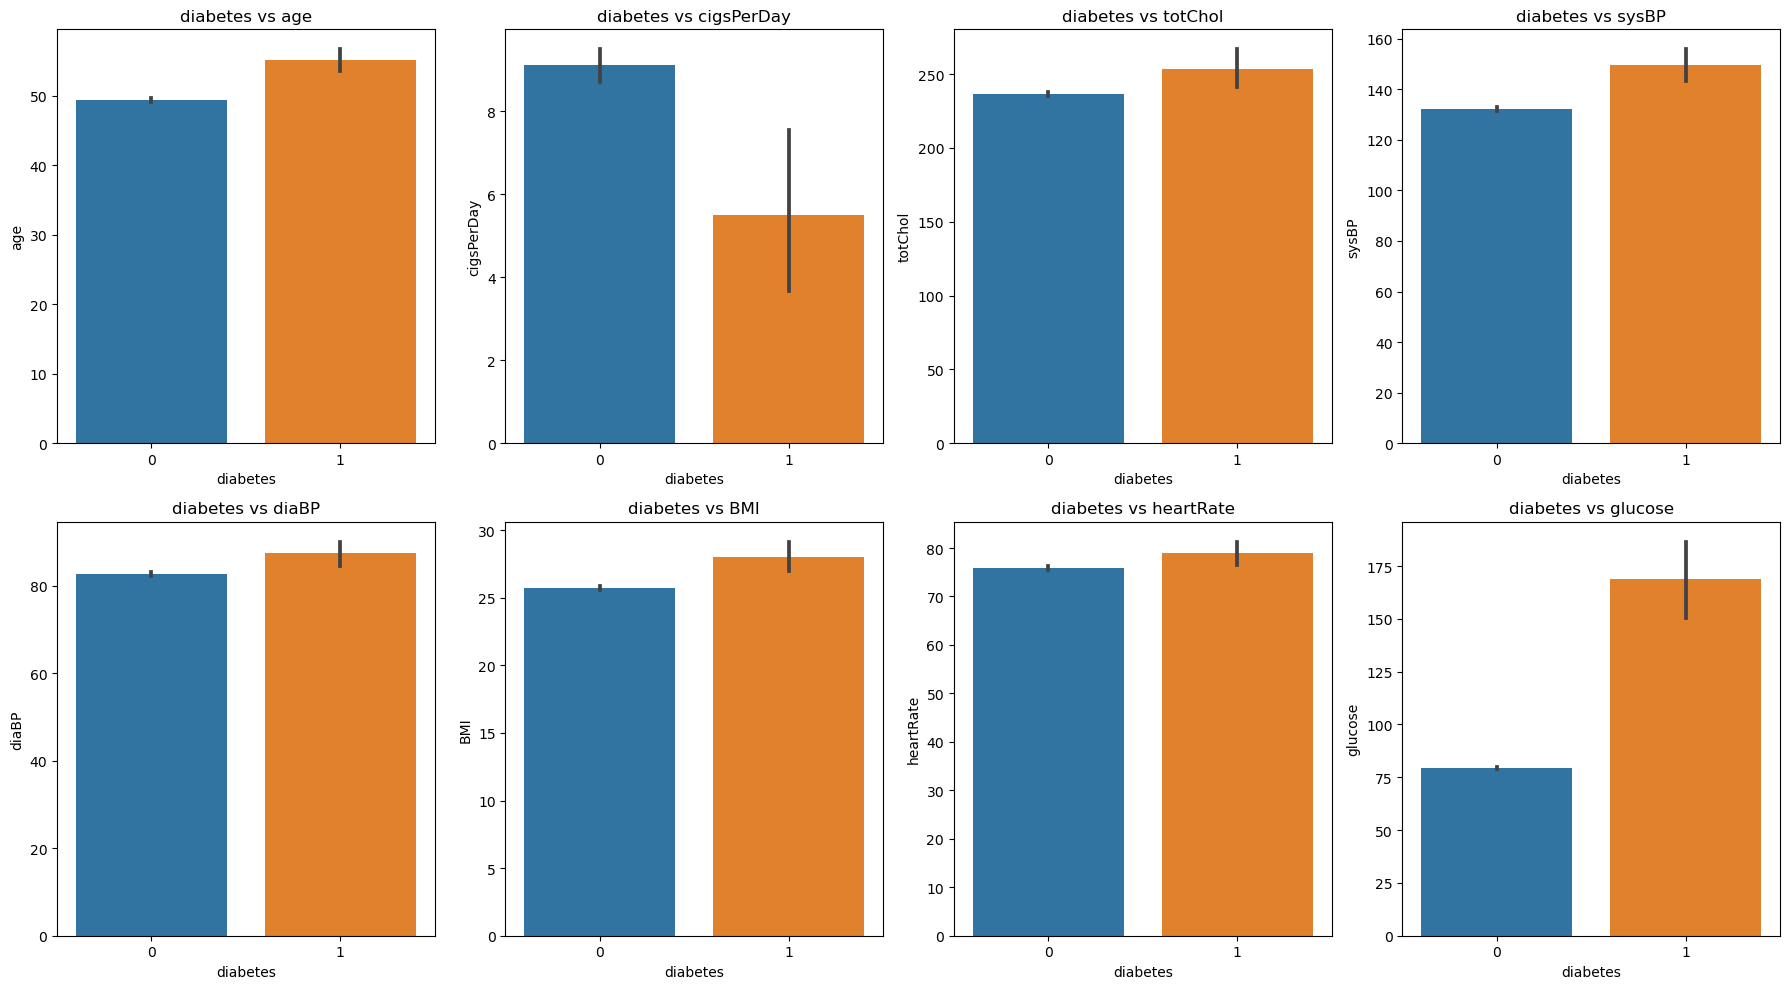

In [20]:
# Diabetes column analysis

plot_categorical_vs_numerical(df,'diabetes',numerical_columns)

- Body Mass Index (BMI): People with diabetes tend to have a higher BMI than those who do not have diabetes. BMI is a measure of a person's weight relative to their height. Having overweight or obesity can increase your risk of type 2 diabetes.
- Smoking: Smoking is a major risk factor for many health problems, including heart disease, stroke, and lung cancer. It may also increase your risk of type 2 diabetes.
- Cholesterol: High cholesterol is a risk factor for heart disease, and people with diabetes are also at increased risk of heart disease.
- Blood Pressure: High blood pressure is another risk factor for heart disease, and people with diabetes are also at increased risk of heart disease.
- Heart Rate: Heart rate is a measure of how many times your heart beats per minute.

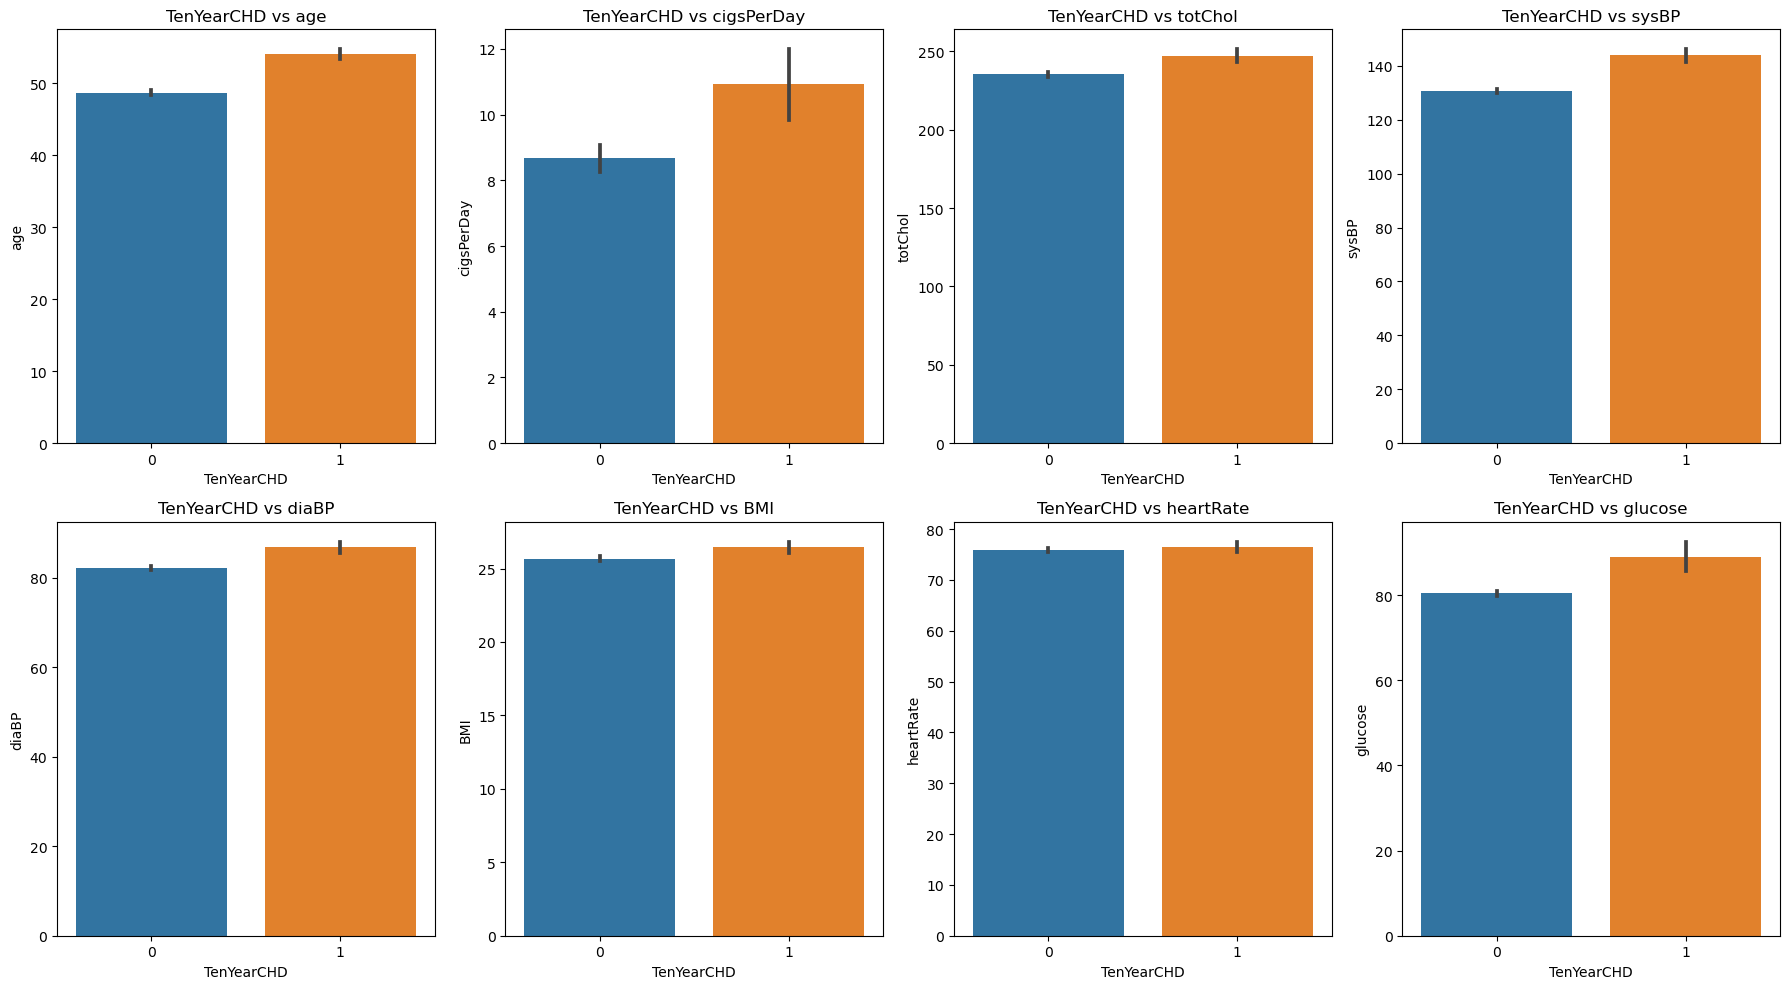

In [21]:
# TenYearCHD column analysis

plot_categorical_vs_numerical(df,'TenYearCHD',numerical_columns)

- There is a weak positive correlation between age and diabetes. This means that as age increases, the likelihood of diabetes also increases. This is consistent with what we already know about diabetes.
- People with diabetes tend to have a higher body mass index (BMI) than those who do not. This is likely because obesity is a major risk factor for type 2 diabetes.
- The data for smoking, total cholesterol, systolic blood pressure (SysBP), diastolic blood pressure (DiaBP), heart rate, and blood sugar is inconclusive. There isn't a clear trend between these factors and diabetes in this dataset.

# Tri-variate Analysis

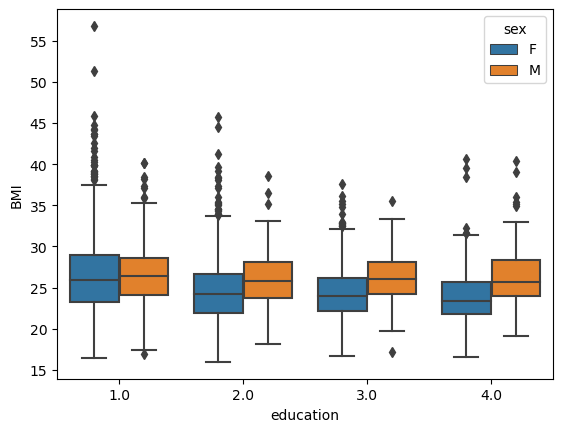

In [33]:
# Checking for Relation Between'education' and 'sex' and 'BMI'
sns.boxplot(x='education', y='BMI', hue='sex', data=df)
plt.show()

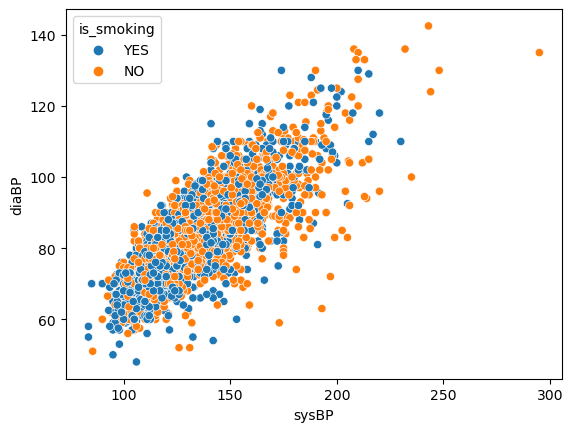

In [23]:
# Relation Between'sysBP' and 'diaBP' and 'is_smoking'

sns.scatterplot(x='sysBP', y='diaBP', hue='is_smoking', data=df)
plt.show()


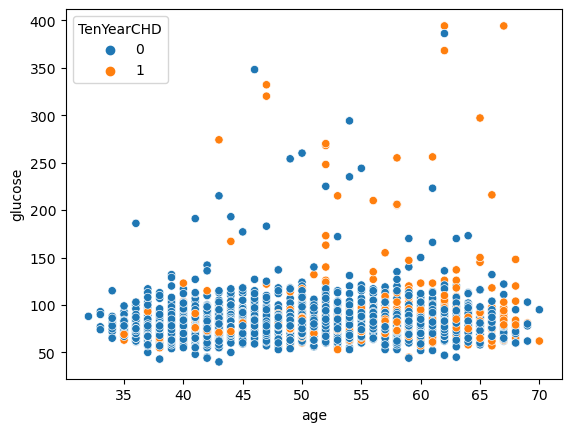

In [24]:
# Checking for relation between age, sex and TenYearCHD

sns.scatterplot(x='age', y='glucose', hue='TenYearCHD', data=df)
plt.show()

- There is a positive correlation between age and glucose levels. This means that as age increases, glucose levels also tend to increase.
- The data points are spread out, indicating a varied range of glucose levels for each age group.
- Some younger individuals have high glucose levels, while some older individuals have lower glucose levels. This suggests that factors other than age may also influence glucose levels.

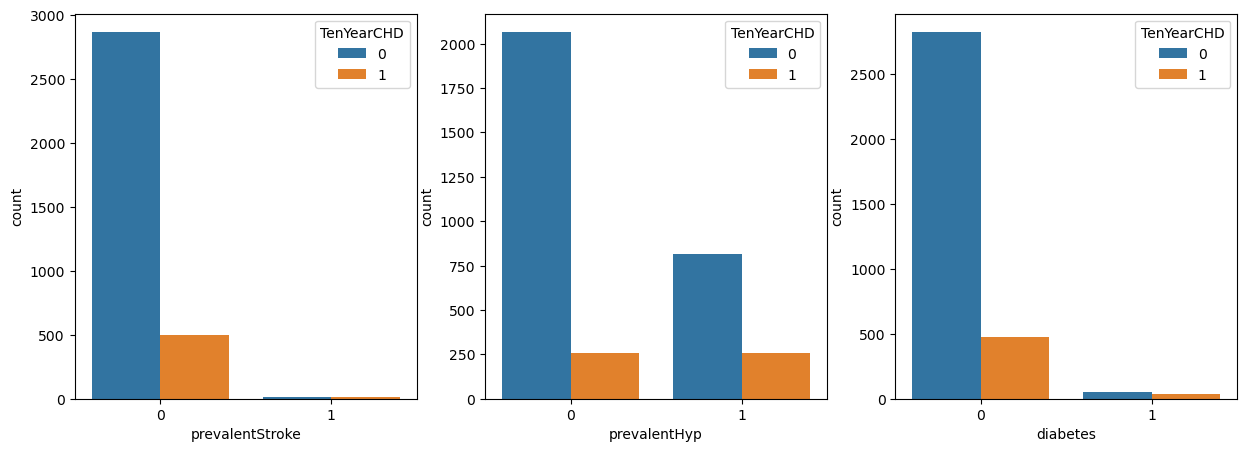

In [25]:
# Checking for relation between prevalentStroke, prevalentHyp and diabetes

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['prevalentStroke', 'prevalentHyp', 'diabetes']):
    sns.countplot(x=col, hue='TenYearCHD', data=df, ax=axes[i])
plt.show()

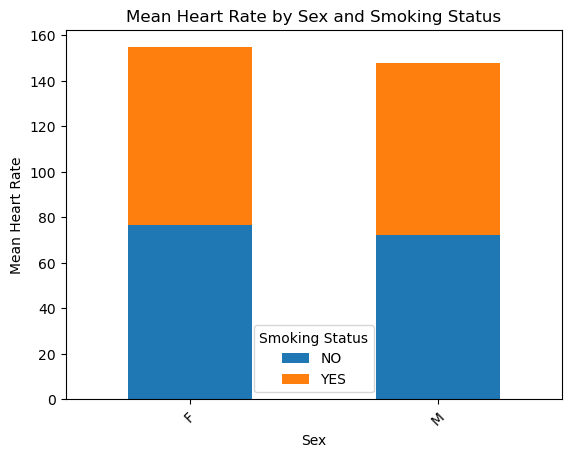

In [27]:
# Relation between sex, is_smaoking and heartRate

grouped = df.groupby(['sex', 'is_smoking'])['heartRate'].mean().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rate by Sex and Smoking Status')
plt.xticks(np.arange(len(grouped.index)), grouped.index, rotation=45)
plt.legend(title='Smoking Status')
plt.show()

- CHD risk increases as the number of prevalent conditions (hypertension and diabetes) increases. The highest risk (around 22-25%) is observed in the Yes-Yes group (having both conditions).
- Within each group, males (orange) generally appear to have a higher CHD risk compared to females (blue).

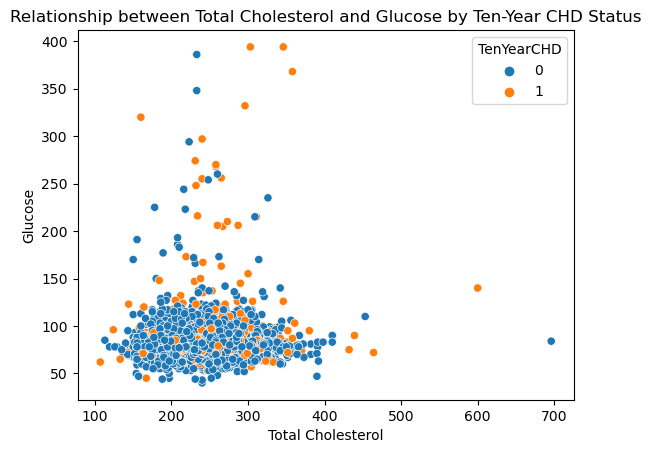

In [28]:
# Realtion between totChol, glucose and TenYearCHD.

sns.scatterplot(x='totChol', y='glucose', hue='TenYearCHD', data=df)
plt.xlabel('Total Cholesterol')
plt.ylabel('Glucose')
plt.title('Relationship between Total Cholesterol and Glucose by Ten-Year CHD Status')
plt.show()

- The graph suggests that prevalent hypertension, prevalent diabetes, and sex all influence the risk of developing CHD within ten years.
- Hypertension (high blood pressure) and diabetes are well-established risk factors for coronary heart disease. Having both conditions can significantly increase the overall risk.
- Men are generally known to have a higher risk of CHD compared to women, especially at younger ages. This difference might explain the larger orange proportions in the stacked bars.

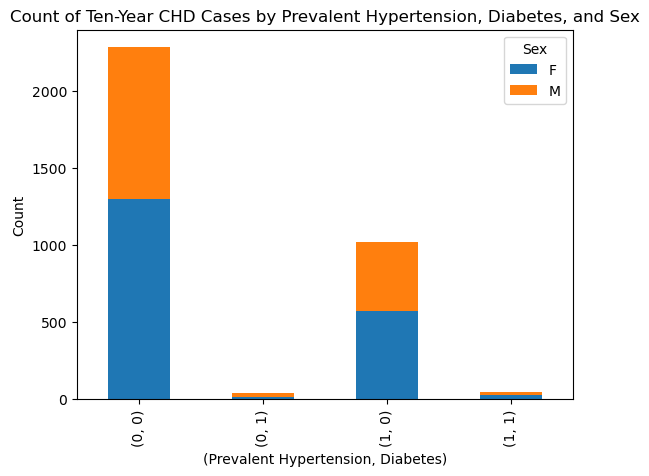

In [31]:
# Checking for relation between prevalentHyp, diabetes and sex

pd.crosstab(index=[df['prevalentHyp'], df['diabetes']], columns=df['sex'], values=df['TenYearCHD'], aggfunc='count').plot(kind='bar', stacked=True)
plt.xlabel('(Prevalent Hypertension, Diabetes)')
plt.ylabel('Count')
plt.title('Count of Ten-Year CHD Cases by Prevalent Hypertension, Diabetes, and Sex')
plt.legend(title='Sex')
plt.show()


# Outlier Detection

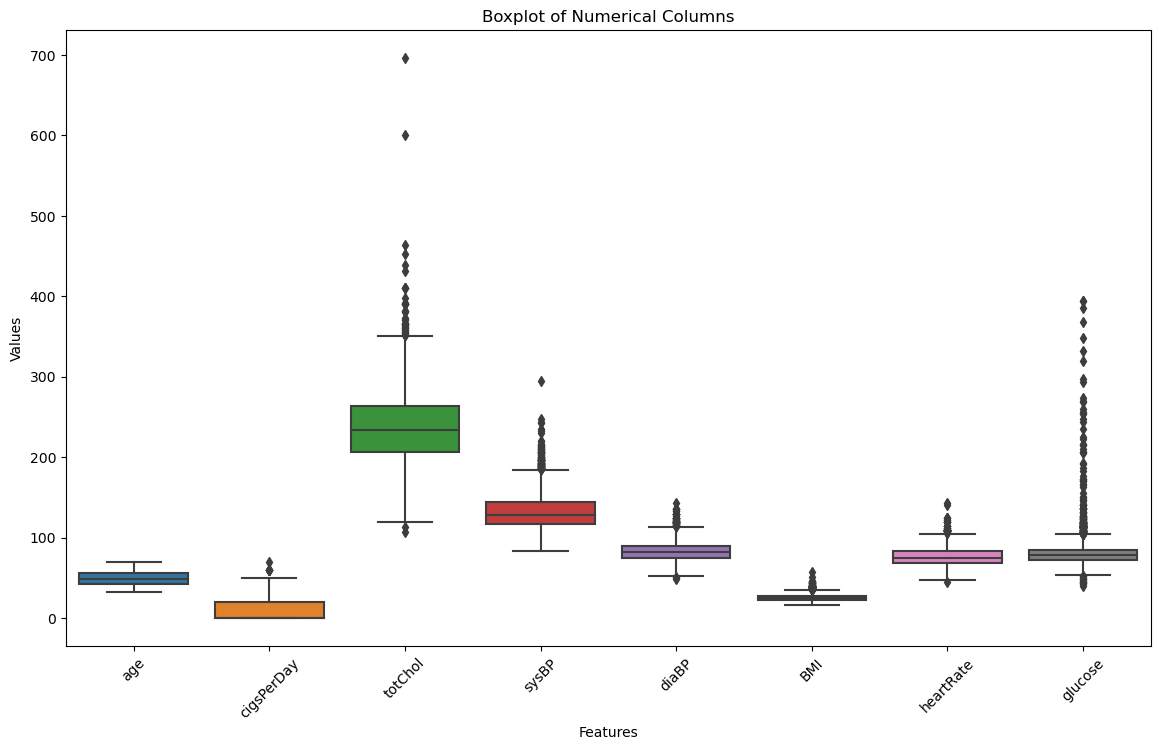

In [34]:
# Outlier Detection 

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [35]:
# Outlier treatment

def treat_outliers(data, columns, lower_percentile=0.05, upper_percentile=0.95):

    for col in columns:
        
        lower_bound = data[col].quantile(lower_percentile)
        upper_bound = data[col].quantile(upper_percentile)
        
        data[col] = np.where(data[col] < lower_bound, lower_bound,np.where(data[col] > upper_bound, upper_bound,data[col]))
        
    return data

treat_outliers(df, numerical_columns)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64.0,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,37.0,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46.0,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50.0,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64.0,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60.0,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46.0,1.0,F,NO,0.0,0.0,0,0,0,199.0,104.0,66.0,21.96,80.0,84.0,0
3387,3387,44.0,3.0,M,YES,3.0,0.0,0,1,0,313.0,164.0,105.0,28.92,73.0,72.0,1
3388,3388,60.0,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [36]:
# Replacing values in columns

df['sex'] = df['sex'].replace({'M': 1, 'F': 0})
df['is_smoking'] = df['is_smoking'].replace({'YES': 1, 'NO': 0})


In [37]:
# Dropping required column

del df['id']

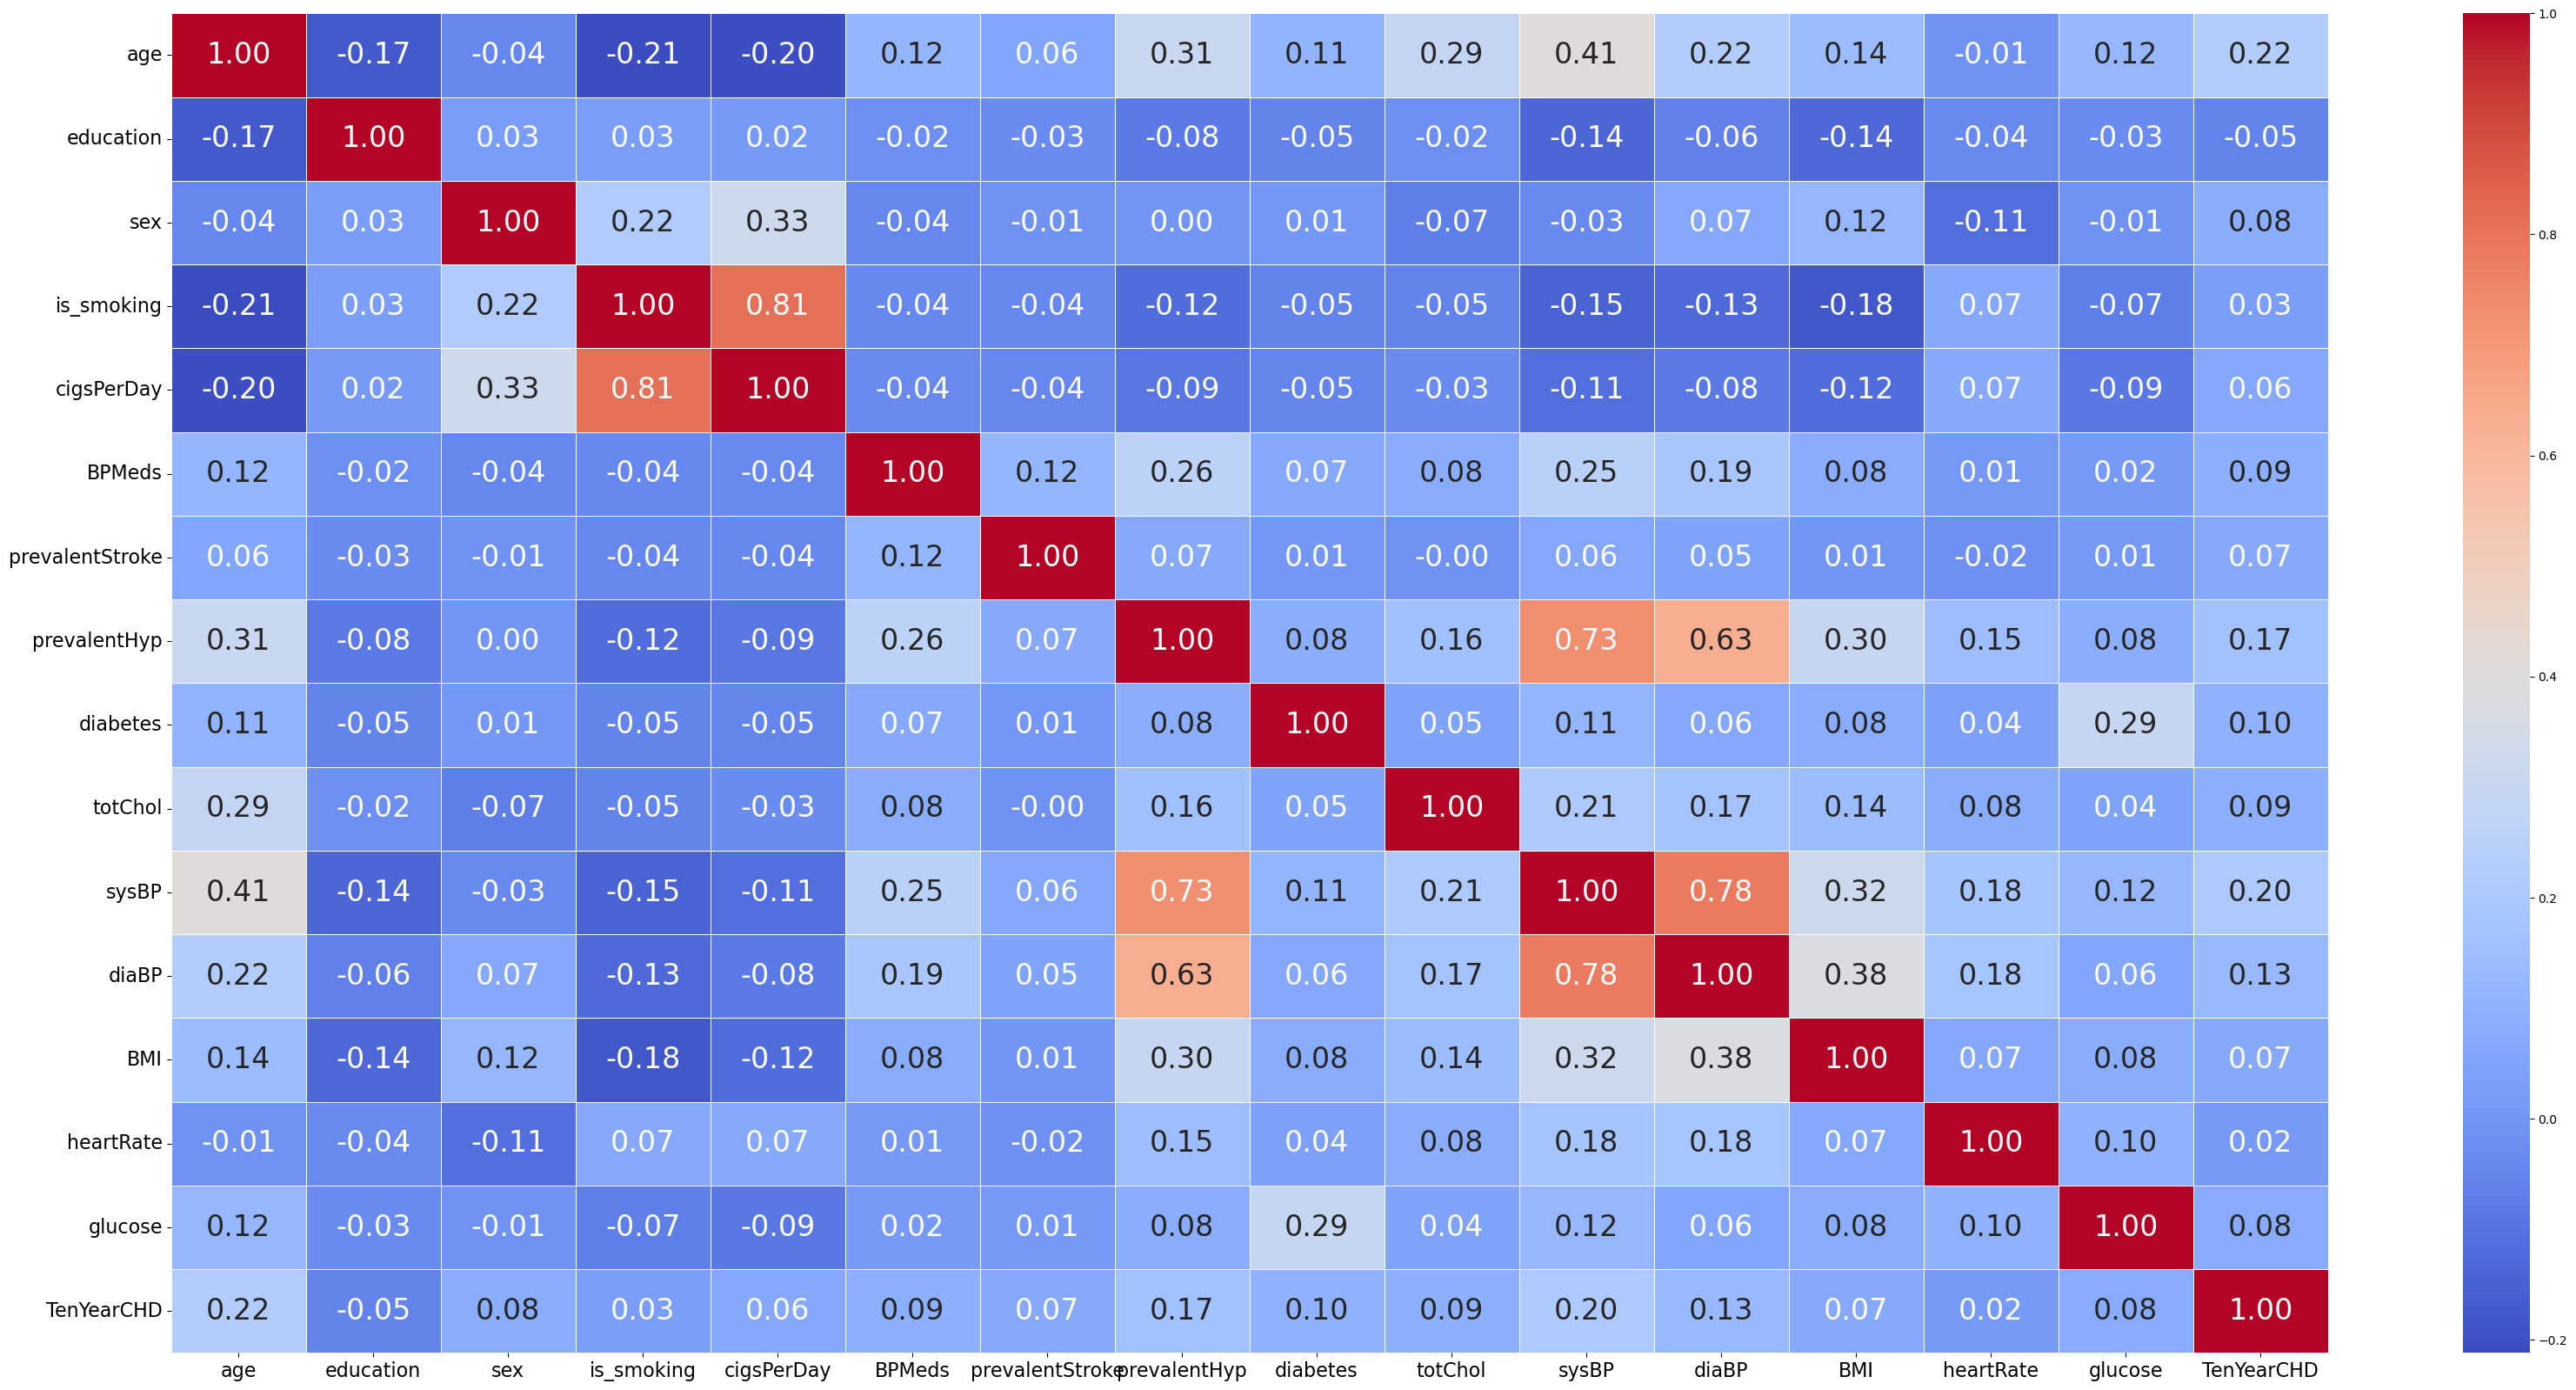

In [38]:
# Correlation Heatmap

plt.figure(figsize=(40,20))
heatmap = sns.heatmap(df[list(df.columns)].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 24})

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)
plt.show()

In [72]:
# Checking to see if there are people who do not smoke but still falls in category of is_smoking.

df[(df['is_smoking'] == 1) & (df['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55.0,1.0,0,1,0.0,0.0,0,1,0,213.0,163.000,91.0,28.66,69.0,66.0,0
466,45.0,3.0,1,1,0.0,0.0,0,1,0,170.0,145.500,99.0,26.74,83.0,85.0,0
469,42.0,1.0,1,1,0.0,0.0,0,0,0,196.0,123.000,73.0,22.06,66.0,78.0,0
491,61.0,1.0,0,1,0.0,0.0,0,1,0,313.0,168.000,98.0,27.30,98.0,106.0,0
538,41.0,1.0,0,1,0.0,0.0,0,0,0,171.0,135.000,82.5,24.35,79.0,82.0,0
767,54.0,1.0,1,1,0.0,0.0,0,0,0,219.0,110.000,72.0,26.05,95.0,86.0,0
1461,47.0,2.0,0,1,0.0,0.0,0,0,0,313.0,127.000,76.0,24.44,72.0,80.0,0
1467,49.0,1.0,0,1,0.0,0.0,0,0,0,252.0,123.000,69.0,21.45,72.0,89.0,0
1597,57.0,1.0,0,1,0.0,0.0,0,0,0,229.0,115.000,69.0,24.43,80.0,93.0,0
1986,49.0,2.0,0,1,0.0,0.0,0,1,0,233.0,158.000,102.0,25.31,90.0,72.0,0


No columns are correlated more than 80% i.e they does not show strong correlation, so no columns were dropped.

# Train Test Spilt

In [40]:
X = df.drop('TenYearCHD', axis= 1)
y= df['TenYearCHD']

In [41]:
from sklearn.model_selection import train_test_split

# X is your feature matrix, y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [42]:
#Standardization

from sklearn.preprocessing import StandardScaler


# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred_test_lg = logistic_model.predict(X_test)
y_pred_train_lg = logistic_model.predict(X_train)

In [45]:
print(confusion_matrix(y_train, y_pred_train_lg))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test_lg))

[[2289   14]
 [ 377   32]]
********************************************************************************************************************************************
[[574   2]
 [ 98   4]]


In [46]:
print(classification_report(y_train, y_pred_train_lg))
print("**************"*8)
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2303
           1       0.70      0.08      0.14       409

    accuracy                           0.86      2712
   macro avg       0.78      0.54      0.53      2712
weighted avg       0.83      0.86      0.80      2712

****************************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.67      0.04      0.07       102

    accuracy                           0.85       678
   macro avg       0.76      0.52      0.50       678
weighted avg       0.83      0.85      0.79       678



In [47]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train_lg))
print("**************"*8)
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test_lg))

Training Accuracy Score 0.8558259587020649
****************************************************************************************************************
Test Accuracy Score 0.8525073746312685


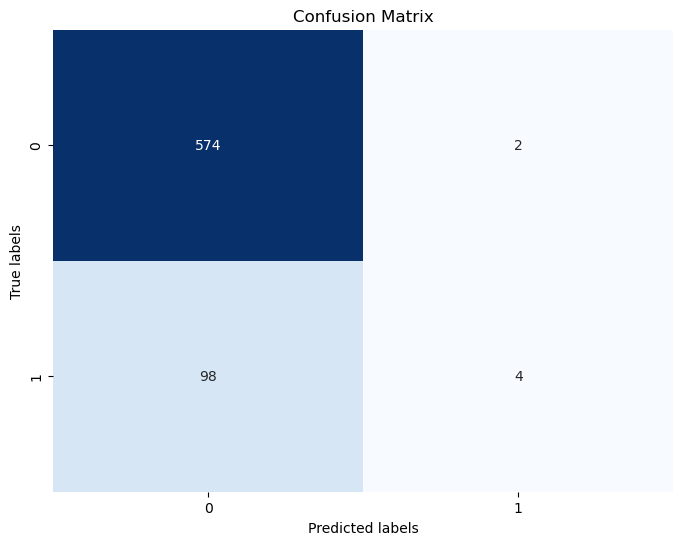

In [48]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_pred_test_lg)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

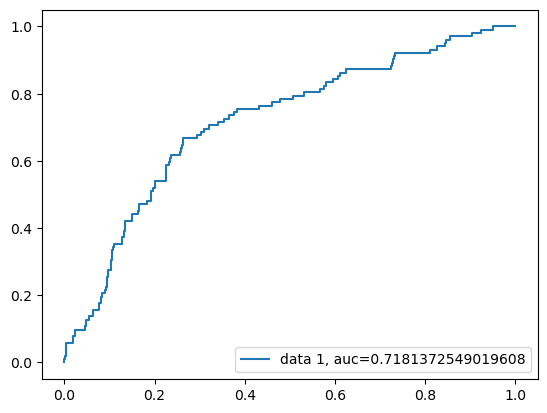

In [49]:
# AUC

y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
# Predict test data with dtregressor model

y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

In [52]:
# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_pred_train_dt)
test_accuracy = accuracy_score(y_test, y_pred_test_dt)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.7684365781710915


**Hyperparameter Tuning**

In [53]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [58]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate a new decision tree classifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)

# Train the model on the training data
best_decision_tree.fit(X_train, y_train)

# Predict on the test data
y_test_pred_dtT = best_decision_tree.predict(X_test)
y_train_pred_dtT = best_decision_tree.predict(X_train)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_dtT)
train_accuracy = accuracy_score(y_train, y_train_pred_dtT)

print("Test Accuracy after Hyperparameter Tuning:", test_accuracy)
print()
print("Train Accuracy after Hyperparameter Tuning:", train_accuracy)

Test Accuracy after Hyperparameter Tuning: 0.8053097345132744

Train Accuracy after Hyperparameter Tuning: 0.9122418879056047


In [59]:
print(classification_report(y_train, y_train_pred_dtT))
print("**************"*8)
print(classification_report(y_test, y_test_pred_dtT))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2303
           1       0.81      0.55      0.65       409

    accuracy                           0.91      2712
   macro avg       0.87      0.76      0.80      2712
weighted avg       0.91      0.91      0.91      2712

****************************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       576
           1       0.27      0.18      0.21       102

    accuracy                           0.81       678
   macro avg       0.57      0.55      0.55       678
weighted avg       0.77      0.81      0.79       678



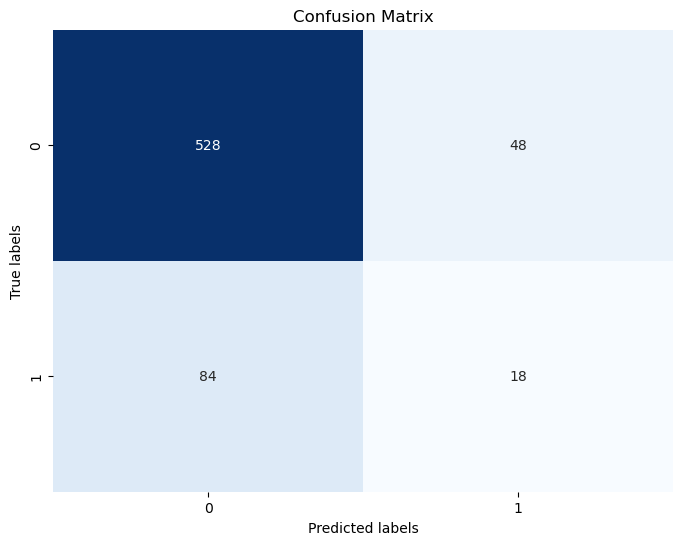

In [68]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_test_pred_dtT)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predict on the test data
y_train_pred_rf = random_forest_model.predict(X_train)
y_test_pred_rf = random_forest_model.predict(X_test)

In [62]:
# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

print("Training Accuracy:", train_accuracy)
print()
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0

Test Accuracy: 0.8480825958702065


In [63]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Calculate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

Accuracy: 0.8480825958702065

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       576
           1       0.43      0.03      0.06       102

    accuracy                           0.85       678
   macro avg       0.64      0.51      0.49       678
weighted avg       0.79      0.85      0.79       678


Confusion Matrix:
[[572   4]
 [ 99   3]]


In [64]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [65]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate a new Random Forest classifier with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the training data
best_random_forest.fit(X_train, y_train)

# Predict on the test data
y_test_pred_rfT = best_random_forest.predict(X_test)
y_train_pred_rfT = best_random_forest.predict(X_train)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rfT)
train_accuracy = accuracy_score(y_train, y_train_pred_rfT)

print("Test Accuracy after Hyperparameter Tuning:", test_accuracy)
print()
print("Train Accuracy after Hyperparameter Tuning:", train_accuracy)

Test Accuracy after Hyperparameter Tuning: 0.8466076696165191

Train Accuracy after Hyperparameter Tuning: 0.8757374631268436


In [66]:
print(classification_report(y_train, y_train_pred_rfT))
print("**************"*8)
print(classification_report(y_test, y_test_pred_rfT))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2303
           1       0.97      0.18      0.31       409

    accuracy                           0.88      2712
   macro avg       0.92      0.59      0.62      2712
weighted avg       0.89      0.88      0.84      2712

****************************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       576
           1       0.25      0.01      0.02       102

    accuracy                           0.85       678
   macro avg       0.55      0.50      0.47       678
weighted avg       0.76      0.85      0.78       678



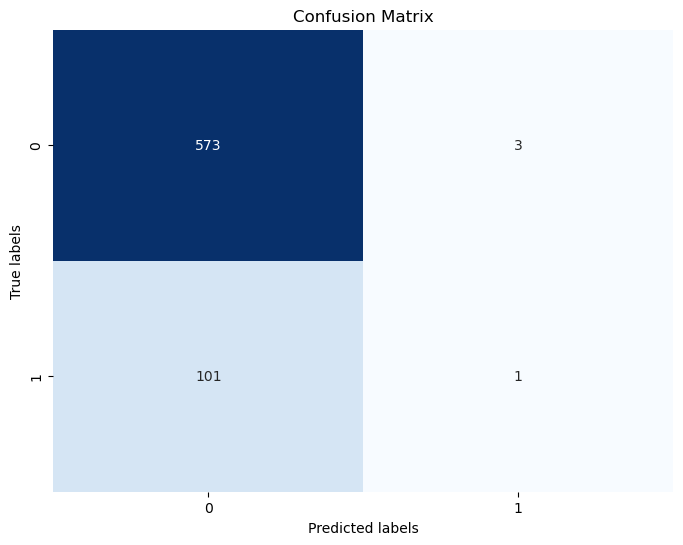

In [67]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_test_pred_rfT)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine Model

In [69]:
from sklearn.svm import SVC

# Assuming X_train, X_test, y_train, and y_test are already defined

# Instantiate the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'linear', 'poly', 'sigmoid'

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [70]:
# Predict on the training and test data
y_train_pred_svm = svm_classifier.predict(X_train)
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred_svm)
test_accuracy = accuracy_score(y_test, y_test_pred_svm)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8595132743362832
Test Accuracy: 0.8466076696165191


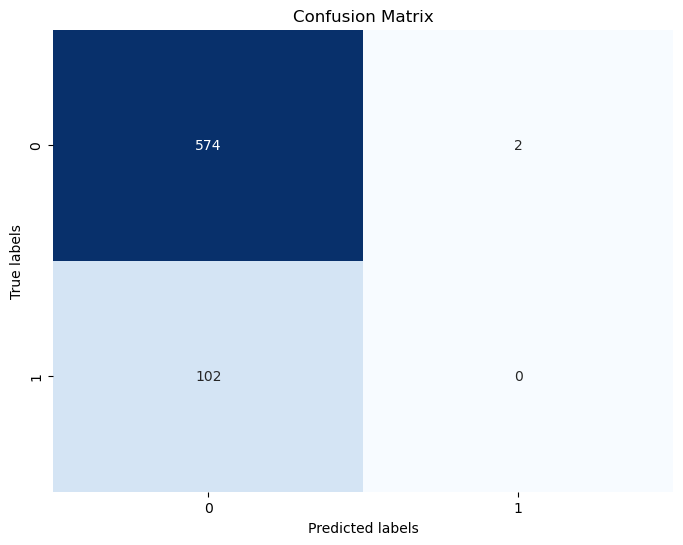

In [71]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_test_pred_svm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()